# OASIS INFOBYTE
# TASK 5: SALES PREDICTION USING PYTHON
# NAME: RUCHITA KAMBLE

## 1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

## 2. Loading the Dataset

In [3]:
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\Oasis Projects\Advertising.csv')

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## 3. Exploratory Data Analysis

In [5]:
df.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
#Dropping the unnecessary column

df = df.drop(columns=['Unnamed: 0'])
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [10]:
df.shape

(200, 4)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Bivariate Analysis

In [12]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


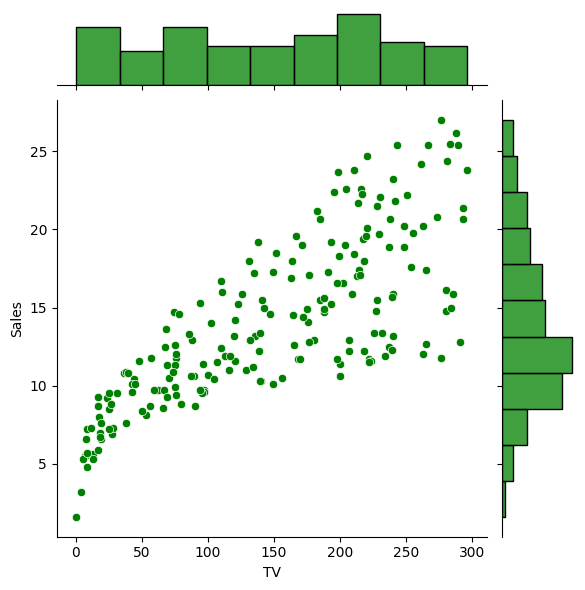

In [13]:
sns.jointplot(x='TV', y='Sales', data=df, color='green')

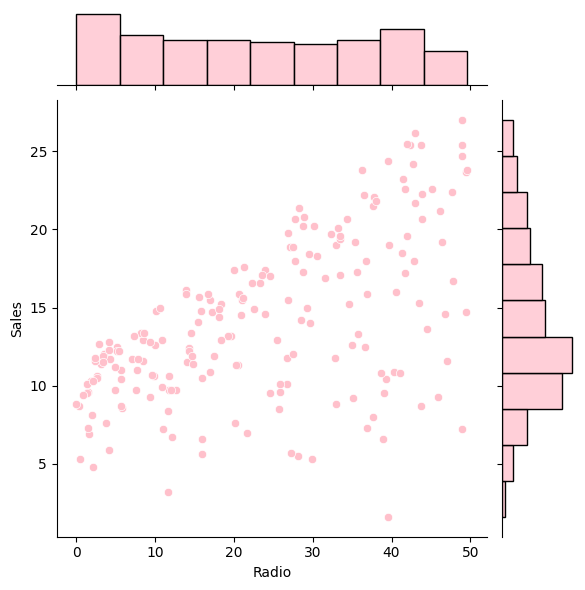

In [14]:
sns.jointplot(x='Radio', y='Sales', data=df, color='pink')

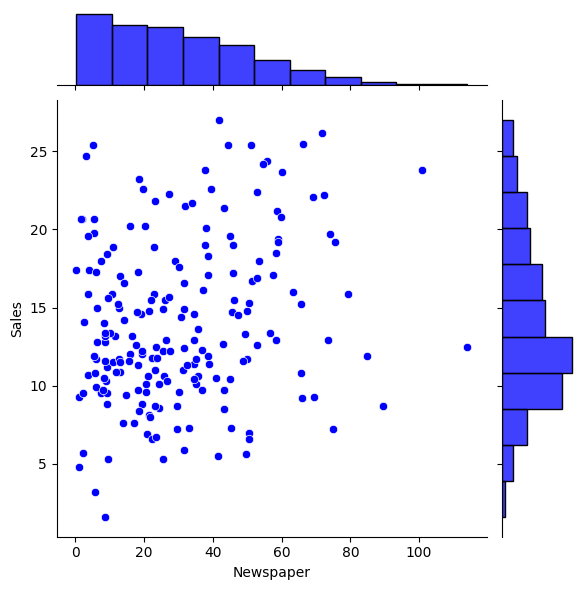

In [40]:
sns.jointplot(x='Newspaper', y='Sales', data=df, color='blue')

## Multivariate Analysis

In [15]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


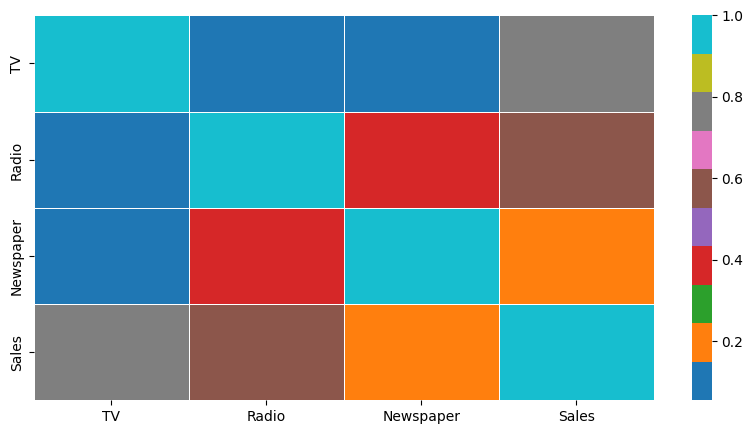

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),linewidths='0.5',fmt='0.1f',cmap='tab10')
plt.show()

# Association is visually represented. Values closer to -1 or 1 shows that two variables are closely asscciated.
# Values closer to 0 shows that two variables are weakly associated. 

### The variables that are highly correlated are: 
1. Radio/Newspaper/TV
2. Sales

## 4. Model Building

In [18]:
X = df.iloc[:,0:-1]
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [19]:
y = df.iloc[:,-1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

## 5. Train-Test Split 

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
X_train

,TV,Radio,Newspaper
116,139.2,14.3,25.6
138,43.0,25.9,20.5
155,4.1,11.6,5.7
82,75.3,20.3,32.5
160,172.5,18.1,30.7
...,...,...,...
58,210.8,49.6,37.7
21,237.4,5.1,23.5
49,66.9,11.7,36.8
64,131.1,42.8,28.9


In [23]:
X_test

,TV,Radio,Newspaper
56,7.3,28.1,41.4
37,74.7,49.4,45.7
67,139.3,14.5,10.2
79,116.0,7.7,23.1
80,76.4,26.7,22.3
188,286.0,13.9,3.7
183,287.6,43.0,71.8
10,66.1,5.8,24.2
128,220.3,49.0,3.2
62,239.3,15.5,27.3


In [24]:
y_train

116    12.2
138     9.6
155     3.2
82     11.3
160    14.4
       ... 
58     23.8
21     12.5
49      9.7
64     18.0
68     18.9
Name: Sales, Length: 160, dtype: float64

In [25]:
y_test

56      5.5
37     14.7
67     13.4
79     11.0
80     11.8
188    15.9
183    26.2
10      8.6
128    24.7
62     15.7
65      9.3
17     24.4
133    19.6
195     7.6
146    13.2
38     10.1
173    11.7
149    10.1
93     22.2
29     10.5
0      22.1
2       9.3
122    11.6
180    10.5
95     16.9
121     7.0
185    22.6
39     21.5
66      9.5
19     14.6
11     17.4
45     14.9
41     17.1
92     19.4
168    17.1
1      10.4
57     13.2
189     6.7
151    11.6
167    12.2
Name: Sales, dtype: float64

In [32]:
X_train = X_train.astype(int)
y_train = y_train.astype(int)
X_test = X_test.astype(int)
y_test = y_test.astype(int)

In [42]:
from sklearn.preprocessing import StandardScaler
st_sc = StandardScaler()
X_train_sc = st_sc.fit_transform(X_train)
X_test_sc = st_sc.fit_transform(X_test)

## 6. Using Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

In [43]:
lr = LinearRegression()
lr.fit(X_train_sc, y_train)

LinearRegression()

In [44]:
y_pred = lr.predict(X_test_sc)
y_pred

array([11.08042581,  8.57343776,  8.15879965, 24.58135699, 12.97096769,
        7.69489354, 13.70600703, 15.94537417, 11.76873223, 17.13178106,
       23.42889215, 10.18859851, 11.47372715, 16.30736957, 12.55127043,
       13.11671676, 19.46267102, 11.77596706, 16.70931294, 18.05859285,
       24.57024897, 10.63992212, 15.96998765, 13.32395307,  6.90097179,
       16.07496141, 13.23498612, 21.55685746, 14.31007566, 10.10589173,
       13.81648354, 22.0034185 , 18.86260696, 21.78054154,  7.72605172,
        7.31151845,  8.9972093 , 13.93308943, 15.53865727,  7.35767297])

## 7. Finding different Scores

In [45]:
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("R2_score:", metrics.r2_score(y_test, y_pred))

MAE: 1.4820534519182238
MSE: 5.408913759032387
R2_score: 0.8281217233452883


### Therefore, the accuracy of the model is 82.81%